Import the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

In [3]:
diabetes_dataset = pd.read_csv('Dataset/diabetes.csv')

In [5]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
diabetes_dataset.shape

(768, 9)

In [8]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
print(diabetes_dataset['Outcome'])

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [9]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
# find out mean value for Outcome
diabetes_dataset.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# treat zeros as missing for specific columns
cols_zero_missing = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for c in cols_zero_missing:
    zeros = (diabetes_dataset[c] == 0).sum()
    print(c, "zeros:", zeros)


Glucose zeros: 5
BloodPressure zeros: 35
SkinThickness zeros: 227
Insulin zeros: 374
BMI zeros: 11


In [16]:
# replacing zeros with mean values
for c in cols_zero_missing:
    mean = diabetes_dataset[c].mean()
    diabetes_dataset[c] = diabetes_dataset[c].replace(0, mean)

In [19]:
diabetes_dataset['Outcome'].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [18]:
print("Baseline (majority) accuracy:", diabetes_dataset['Outcome'].value_counts(normalize=True).max())

Baseline (majority) accuracy: 0.6510416666666666


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

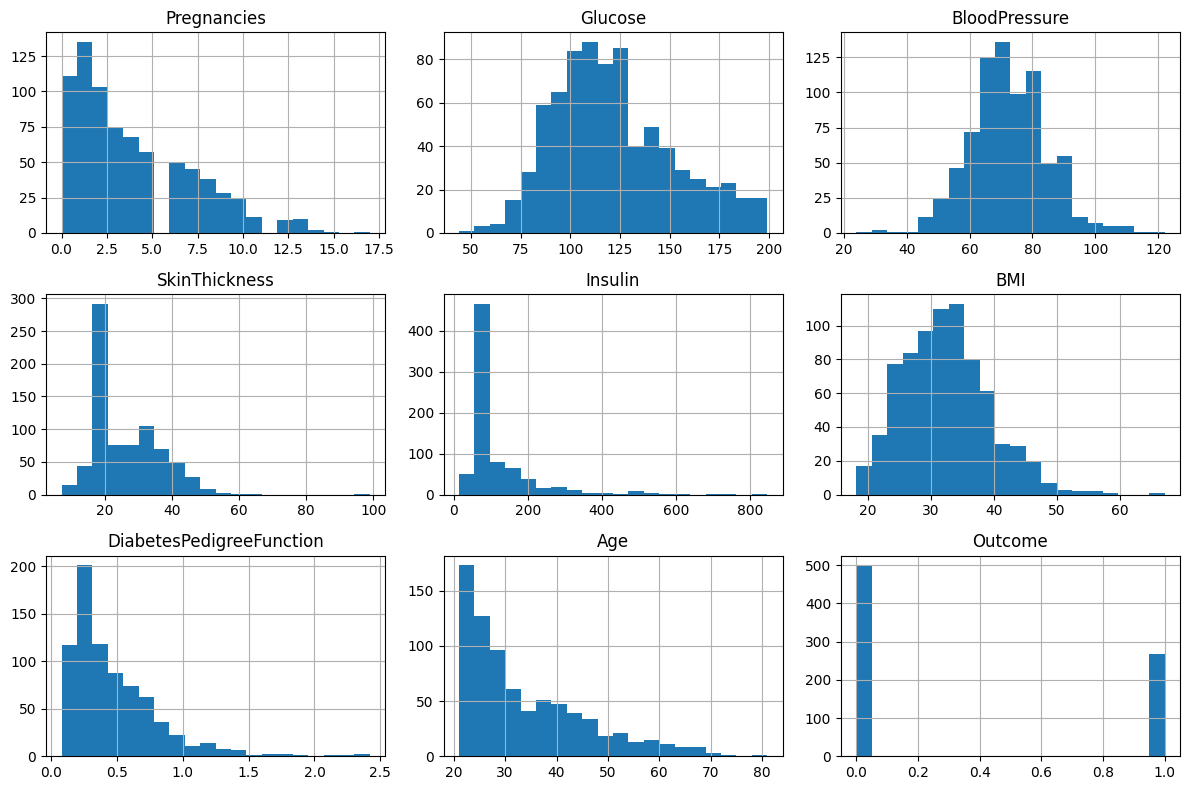

In [21]:
diabetes_dataset.hist(bins=20, figsize=(12,8))
plt.tight_layout()

<Axes: >

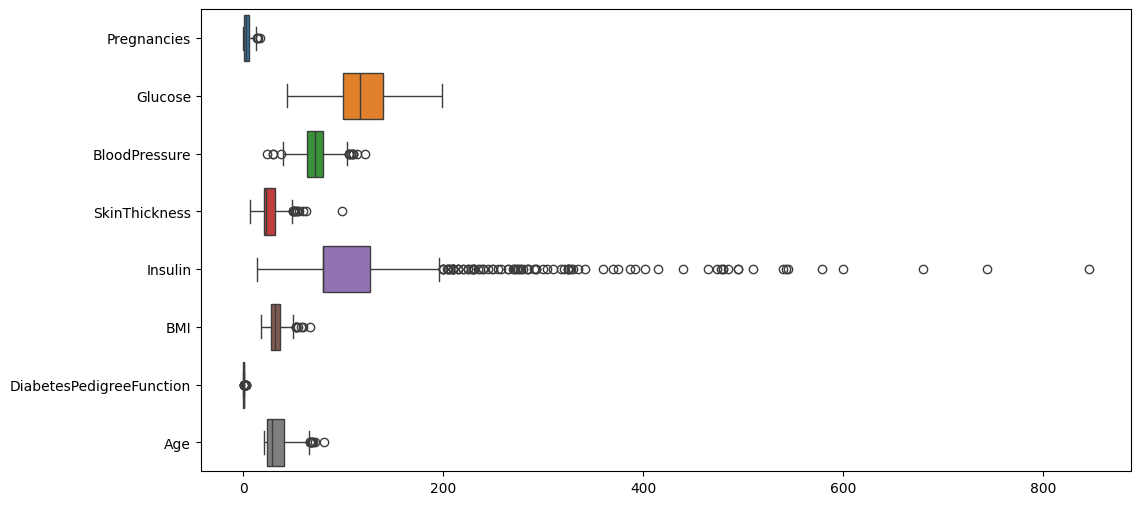

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(data=diabetes_dataset.drop(columns='Outcome'), orient='h')


Text(0.5, 1.0, 'Feature Correlations')

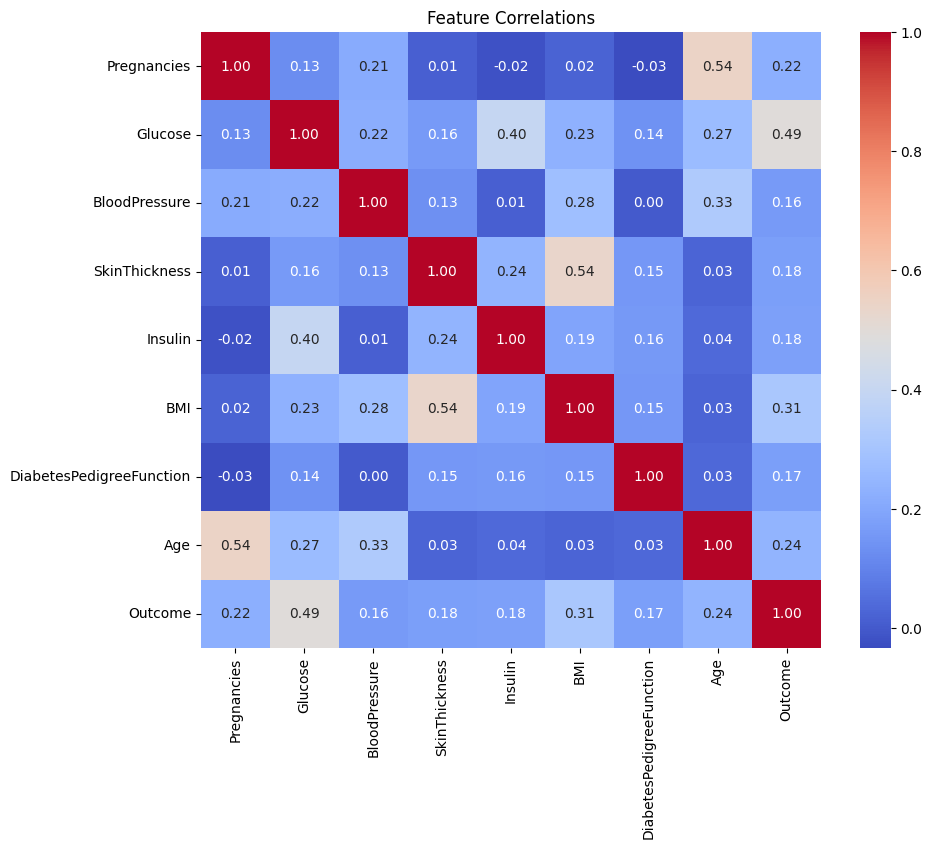

In [23]:
# correlation
plt.figure(figsize=(10,8))
sns.heatmap(diabetes_dataset.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlations")

In [24]:
# Seperating features and target
X = diabetes_dataset.drop(columns='Outcome', axis=1)
y = diabetes_dataset['Outcome']

Data Standardization

In [25]:
scaler = StandardScaler()


In [28]:
standardized_data = scaler.fit_transform(X)

In [32]:
print(standardized_data)

[[ 0.63994726  0.86527574 -0.0210444  ...  0.16725546  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20598931 -0.51658286 ... -0.85153454 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01597855 -0.68176235 ... -1.33182125  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02240928 -0.0210444  ... -0.90975111 -0.68519336
  -0.27575966]
 [-0.84488505  0.14197684 -1.01212132 ... -0.34213954 -0.37110101
   1.17073215]
 [-0.84488505 -0.94297153 -0.18622389 ... -0.29847711 -0.47378505
  -0.87137393]]


In [33]:
X = standardized_data
y = diabetes_dataset['Outcome']

Train Test Split

In [34]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the model

In [37]:
classifier = svm.SVC(kernel='linear')

In [38]:
# Training the model support vector Machine
classifier.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Evaluating the model

In [39]:
# accuracy on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

In [40]:
print(training_data_accuracy)

0.7801302931596091


In [41]:
# accuracy on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)

In [43]:
print('Test data Accuracy: ', test_data_accuracy)

Test data Accuracy:  0.7792207792207793


Making Predictive System

In [ ]:
# Predictive System
input_data = (3,126,88,41,235,39.3,0.704,27)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)

print(prediction)
if (prediction[0]== 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[[-0.25095213  0.14197684  1.30039148  1.49543565  1.25070053  0.9968416
   0.70104112 -0.53102292]]
[0]
The person is not diabetic


/home/mithranes/Documents/old/Machine Learning/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
